# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [98]:
# Importing appropriate modules/packages

import pandas as pd
import numpy as np
import tweepy
import json
import requests
import matplotlib.pyplot as plt

In [99]:
df = pd.read_csv(r"C:\Users\User\Documents\Udacity\Project II\twitter-archive-enhanced.csv")
# Displaying the first 5 rows
df.sample(3)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1230  713411074226274305                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
449   819004803107983360                    NaN                  NaN   

                      timestamp  \
1230  2016-03-25 17:03:49 +0000   
25    2017-07-18 00:07:08 +0000   
449   2017-01-11 02:15:36 +0000   

                                                 source  \
1230  <a href="http://twitter.com/download/iphone" r...   
25    <a href="http://twitter.com/download/iphone" r...   
449   <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1230  Here we see an extremely rare Bearded Floofmal...                  NaN   
25    This... is a Jubilant Antarctic House Bear. We...                  NaN   
449   This is Bo. He was a very good First Doggo. 14...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1230                       NaN                        NaN   
25                         NaN                        NaN   
449                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1230  https://twitter.com/dog_rates/status/713411074...                11   
25    https://twitter.com/dog_rates/status/887101392...                12   
449   https://twitter.com/dog_rates/status/819004803...                14   

      rating_denominator  name  doggo floofer pupper puppo  
1230                  10  None   None    None   None  None  
25                    10  None   None    None   None  None  
449                   10    Bo  doggo    None   None  None

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [100]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [101]:
r = requests.get(url, auth=('user', 'pass'))
r.status_code

200

In [102]:
r.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [103]:
r.encoding

'utf-8'

In [104]:
# Using Python's with open method in opening the file
#  the "wb" mode opens the file in binary format for writing
with open('image_predictions.tsv', 'wb') as data_file:
    data_file.write(r.content)

In [105]:
# Reading the image predictions file and saving the data as a variable
df_image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

# Viewing part of the data, sample of 30 random rows
df_image_predictions.sample(5)

tweet_id                                          jpg_url  \
444   674644256330530816  https://pbs.twimg.com/media/CVzRXmXWIAA0Fkr.jpg   
712   685321586178670592  https://pbs.twimg.com/media/CYLAWFMWMAEcRzb.jpg   
245   670468609693655041  https://pbs.twimg.com/media/CU37pEoWUAAitje.jpg   
19    666273097616637952  https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
1798  831650051525054464  https://pbs.twimg.com/media/C4qdThOWAAI3WX3.jpg   

      img_num                 p1   p1_conf  p1_dog              p2   p2_conf  \
444         1        soccer_ball  0.398102   False          basset  0.335692   
712         1        Boston_bull  0.972483    True  French_bulldog  0.025469   
245         1            minivan  0.730152   False     beach_wagon  0.078661   
19          1  Italian_greyhound  0.176053    True     toy_terrier  0.111884   
1798        1         Eskimo_dog  0.530416    True  Siberian_husky  0.180335   

      p2_dog                  p3   p3_conf  p3_dog  
444     True      cocker_spaniel  0.072941    True  
712     True               boxer  0.000458    True  
245    False           car_wheel  0.064346   False  
19      True             basenji  0.111152    True  
1798    True  Norwegian_elkhound  0.104314    True

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [106]:
# Using the available twitter information we have
# First, importing tweepy
import tweepy

CONSUMER_KEY = '0mS0LYZxlawCGGBEY1abVmQ4o'
CONSUMER_SECRET = 'oyUFYOq3X3Zt3g0bnWBbwRQdGkRyAjuBZmRrgoB8RJwiYSjNtx'
ACCESS_TOKEN = '1412882069877936132-tPjcUYAvsKXd14P9Ib9k2lMREJ5V8e'
ACCESS_SECRET = 'Sf76vI6s4iNxLARbFQxvFGPXDnK2qBSOPIA8ROHbURiIt'

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)

auth = tweepy.API(auth, wait_on_rate_limit = True)

In [107]:
for tweet_id in df['tweet_id']:
    try:
        tweet = api.get_status(tweet_id, tweet_mode = 'extended')
        with open('tweet_json.txt', 'w') as file:
            json.dump(tweet._json, file)
            file.write('\n')
        print ('for id = ' , tweet_id, 'Successfull')
    except:
        print ('for id = ' , tweet_id, 'Failure')

for id =  892420643555336193 Failure
for id =  892177421306343426 Failure
for id =  891815181378084864 Failure
for id =  891689557279858688 Failure
for id =  891327558926688256 Failure
for id =  891087950875897856 Failure
for id =  890971913173991426 Failure
for id =  890729181411237888 Failure
for id =  890609185150312448 Failure
for id =  890240255349198849 Failure
for id =  890006608113172480 Failure
for id =  889880896479866881 Failure
for id =  889665388333682689 Failure
for id =  889638837579907072 Failure
for id =  889531135344209921 Failure
for id =  889278841981685760 Failure
for id =  888917238123831296 Failure
for id =  888804989199671297 Failure
for id =  888554962724278272 Failure
for id =  888202515573088257 Failure
for id =  888078434458587136 Failure
for id =  887705289381826560 Failure
for id =  887517139158093824 Failure
for id =  887473957103951883 Failure
for id =  887343217045368832 Failure
for id =  887101392804085760 Failure
for id =  886983233522544640 Failure
f

for id =  801167903437357056 Failure
for id =  801127390143516673 Failure
for id =  801115127852503040 Failure
for id =  800859414831898624 Failure
for id =  800855607700029440 Failure
for id =  800751577355128832 Failure
for id =  800513324630806528 Failure
for id =  800459316964663297 Failure
for id =  800443802682937345 Failure
for id =  800388270626521089 Failure
for id =  800188575492947969 Failure
for id =  800141422401830912 Failure
for id =  800018252395122689 Failure
for id =  799774291445383169 Failure
for id =  799757965289017345 Failure
for id =  799422933579902976 Failure
for id =  799308762079035393 Failure
for id =  799297110730567681 Failure
for id =  799063482566066176 Failure
for id =  798933969379225600 Failure
for id =  798925684722855936 Failure
for id =  798705661114773508 Failure
for id =  798701998996647937 Failure
for id =  798697898615730177 Failure
for id =  798694562394996736 Failure
for id =  798686750113755136 Failure
for id =  798682547630837760 Failure
f

for id =  706901761596989440 Failure
for id =  706681918348251136 Failure
for id =  706644897839910912 Failure
for id =  706593038911545345 Failure
for id =  706538006853918722 Failure
for id =  706516534877929472 Failure
for id =  706346369204748288 Failure
for id =  706310011488698368 Failure
for id =  706291001778950144 Failure
for id =  706265994973601792 Failure
for id =  706169069255446529 Failure
for id =  706166467411222528 Failure
for id =  706153300320784384 Failure
for id =  705975130514706432 Failure
for id =  705970349788291072 Failure
for id =  705898680587526145 Failure
for id =  705786532653883392 Failure
for id =  705591895322394625 Failure
for id =  705475953783398401 Failure
for id =  705442520700944385 Failure
for id =  705428427625635840 Failure
for id =  705239209544720384 Failure
for id =  705223444686888960 Failure
for id =  705102439679201280 Failure
for id =  705066031337840642 Failure
for id =  704871453724954624 Failure
for id =  704859558691414016 Failure
f

for id =  672828477930868736 Failure
for id =  672640509974827008 Failure
for id =  672622327801233409 Failure
for id =  672614745925664768 Failure
for id =  672609152938721280 Failure
for id =  672604026190569472 Failure
for id =  672594978741354496 Failure
for id =  672591762242805761 Failure
for id =  672591271085670400 Failure
for id =  672538107540070400 Failure
for id =  672523490734551040 Failure
for id =  672488522314567680 Failure
for id =  672482722825261057 Failure
for id =  672481316919734272 Failure
for id =  672475084225949696 Failure
for id =  672466075045466113 Failure
for id =  672272411274932228 Failure
for id =  672267570918129665 Failure
for id =  672264251789176834 Failure
for id =  672256522047614977 Failure
for id =  672254177670729728 Failure
for id =  672248013293752320 Failure
for id =  672245253877968896 Failure
for id =  672239279297454080 Failure
for id =  672231046314901505 Failure
for id =  672222792075620352 Failure
for id =  672205392827572224 Failure
f

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [108]:
# Using describe to get an overview of the dataframe and its variable's descriptrive statistics
df.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [110]:
# checking for posible duplicates
df.duplicated().sum()

0

## Checking the df_image_predictions dataframe

In [111]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [112]:
# checking for posible duplicates
df_image_predictions.duplicated().sum()

0

In [113]:
# Using describe to examine descriptive statistics for the dataframe
df_image_predictions.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [114]:
# Checking if there are any duplicate ids in the tweets recorded
df_image_predictions['tweet_id'].duplicated().sum()

0

### Examining the tweet_json dataframe

In [115]:
with open('tweet_json.txt') as f:
   tweet_data = f.readlines()
tweet_data

['{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He\'s a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"large": {"w": 540, "h": 528, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "medium": {"w": 540, "h": 528, "resize": "fit"}}}]}, "extended_entities": {"me

### Quality issues

1. The source for the Tweets are too long, which can be grouped into three main areas for clarity and analysis

2. Not all tweets have images, i,e., expanded_url's in them, and for consistency, this can be removed for respective dogs.

3. Mix ups in representing NaN values, with some rows indicated as "None" and others using the word "NaN"

4. Varying rating numerators in the dataframe. For consistency, this can be changed to be uniform for the numerator dog values

5. In image descriptions, some names have underscores likely confusing, e.g., "Rhodesian_ridgeback" for "Rhodesian ridgeback"

6. Time stamp challenges, in that it is represented both as date and clock times on same column

7. Different irrelevant or non-clear names for the doggs, e.g., "a", "an" and "the" for a dog names is not very clear

8. Inconsistencies in image_predictions with uppper and lowercases, e.g., beagle => Beagle, malamute => Malamute, chow ==> Chow

### Tidiness issues

1. None relevant information or columns in the dataframe, which can be removed in the analysis, e.g.,
    - 'in_reply_to_status_id'
    - 'in_reply_to_user_id'
    - 'retweeted_status_id', and
    - 'retweeted_status_user_id'
2. Dog types/levels are set on their own column than being combined into one for all, i.e., doggo,floofer,pupper,puppo

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [116]:
# Make copies of original pieces of data
# Copy of twitter_archive_df
twitter_archive_copy = df.copy()

# Copy of tweet_json_df
tweet_json_copy = tweet_json.copy()

# Copy of image_predictions
image_predictions_copy = df_image_predictions.copy()


## Quality Issues

### Issue #1: Adjusting Tweet's Sources

#### Define: Readjusting Tweet Sources into Three (3) Groupings, i.e., "Twitter for iPhone", "Vine - Make a Scene" and "TweetDeck"

#### Code

In [117]:
# As shown below, there are four (4) core sources
twitter_archive_copy['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [118]:
# Replacing the source naming with simpler information,
# That is, Twitter for iPhone, TweetDeck, Twitter Wen Client and Vine - Make a Scenario

twitter_archive_copy['source'] = twitter_archive_copy['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
twitter_archive_copy['source'] = twitter_archive_copy['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
twitter_archive_copy['source'] = twitter_archive_copy['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')
twitter_archive_copy['source'] = twitter_archive_copy['source'].str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>', 'TweetDeck')

C:\Users\User\AppData\Local\Temp/ipykernel_1444/3850507176.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_archive_copy['source'] = twitter_archive_copy['source'].str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'Twitter for iPhone')
C:\Users\User\AppData\Local\Temp/ipykernel_1444/3850507176.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_archive_copy['source'] = twitter_archive_copy['source'].str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>', 'Twitter Web Client')
C:\Users\User\AppData\Local\Temp/ipykernel_1444/3850507176.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  twitter_archive_copy['source'] = twitter_archive_copy['source'].str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>', 'Vine - Make a Scene')

#### Test

In [119]:
# Checking 'source' using .value_counts() method
twitter_archive_copy['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Issue #2: Dropping Tweets without images, i.e., expanded URLS

#### Define: In this section, the goal is using Python to drop Tweets without expanded URLs for uniformity in the dataframe

#### Code

In [120]:
# Checking their scope using value_counts() method
twitter_archive_copy['expanded_urls'].value_counts().sum()

2297

In [121]:
# Checking the total number of rows without expanded_urls
twitter_archive_copy['expanded_urls'].isnull().sum()

59

- As shown from above, only 59 rows have no expanded_urls
- This can be dropped for consistency

In [122]:
twitter_archive_copy['expanded_urls'].dropna(inplace=True)
twitter_archive_copy.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp              source  \
0  2017-08-01 16:23:56 +0000  Twitter for iPhone   
1  2017-08-01 00:17:27 +0000  Twitter for iPhone   
2  2017-07-31 00:18:03 +0000  Twitter for iPhone   
3  2017-07-30 15:58:51 +0000  Twitter for iPhone   
4  2017-07-29 16:00:24 +0000  Twitter for iPhone   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [123]:
twitter_archive_copy = twitter_archive_copy[~twitter_archive_copy['expanded_urls'].isnull()]

#### Test

In [124]:
# Checking if the expanded_urls, i.e., the 59 are in the new cleaned dataframe
# As shown in the table below, nothing is returned based on .isnull() method
twitter_archive_copy[twitter_archive_copy['expanded_urls'].isnull()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [125]:
# If we check counts, it is now zero(0)
twitter_archive_copy['expanded_urls'].isnull().sum()

0

### Issue 3: Mix up in representing NaN values for some rows and others "None" "NaN"

### Define

- In the dataset, there are sections where NaN is used while others have None
- For consistency, all the NaN items in the dataframe can be replaced with "None"

#### Code

In [126]:
twitter_archive_copy.replace(np.NaN, "None", inplace=True)

- As shown from above, for any None, there is replacing them with NaN

#### Test

In [127]:
# Getting a sample of the data to see the changes
twitter_archive_copy.sample(3)

tweet_id in_reply_to_status_id in_reply_to_user_id  \
1513  691096613310316544                  None                None   
721   783334639985389568                  None                None   
1686  681610798867845120                  None                None   

                      timestamp              source  \
1513  2016-01-24 03:14:07 +0000  Twitter for iPhone   
721   2016-10-04 15:55:06 +0000  Twitter for iPhone   
1686  2015-12-28 23:00:52 +0000  Twitter for iPhone   

                                                   text retweeted_status_id  \
1513  Here we see one dog giving a puptalk to anothe...                None   
721   This is Dave. He's currently in a predicament....                None   
1686          *collapses* 12/10 https://t.co/C7M8mnzHIK                None   

     retweeted_status_user_id retweeted_status_timestamp  \
1513                     None                       None   
721                      None                       None   
1686                     None                       None   

                                          expanded_urls  rating_numerator  \
1513  https://twitter.com/dog_rates/status/691096613...                11   
721   https://twitter.com/dog_rates/status/783334639...                12   
1686  https://twitter.com/dog_rates/status/681610798...                12   

      rating_denominator  name doggo floofer pupper puppo  
1513                  10  None  None    None   None  None  
721                   10  Dave  None    None   None  None  
1686                  10  None  None    None   None  None

### Issue #4: Adjusting Rating in Numerator for Consistency in the Dataset

#### Define

The goal is realizing consistency in the dataset, which can be attained by changing the ratings to ten (10), which is the most common rating value

#### Code

In [128]:
# Finding the number of ratings for all the data
twitter_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2297 non-null   int64 
 1   in_reply_to_status_id       2297 non-null   object
 2   in_reply_to_user_id         2297 non-null   object
 3   timestamp                   2297 non-null   object
 4   source                      2297 non-null   object
 5   text                        2297 non-null   object
 6   retweeted_status_id         2297 non-null   object
 7   retweeted_status_user_id    2297 non-null   object
 8   retweeted_status_timestamp  2297 non-null   object
 9   expanded_urls               2297 non-null   object
 10  rating_numerator            2297 non-null   int64 
 11  rating_denominator          2297 non-null   int64 
 12  name                        2297 non-null   object
 13  doggo                       2297 non-null   obje

#### Ratings for Numerator

In [129]:
# Finding the number of ratings for all the data
twitter_archive_copy['rating_numerator']

0       13
1       13
2       12
3       13
4       12
        ..
2351     5
2352     6
2353     9
2354     7
2355     8
Name: rating_numerator, Length: 2297, dtype: int64

- As shown above, some ratings are 13, 12, 9, 8, 7, 6, and 5

In [130]:
# Finding the number of ratings for numerator that are not 10 (!10)
twitter_archive_copy[twitter_archive_copy['rating_numerator'] != 10]

tweet_id in_reply_to_status_id in_reply_to_user_id  \
0     892420643555336193                  None                None   
1     892177421306343426                  None                None   
2     891815181378084864                  None                None   
3     891689557279858688                  None                None   
4     891327558926688256                  None                None   
...                  ...                   ...                 ...   
2351  666049248165822465                  None                None   
2352  666044226329800704                  None                None   
2353  666033412701032449                  None                None   
2354  666029285002620928                  None                None   
2355  666020888022790149                  None                None   

                      timestamp              source  \
0     2017-08-01 16:23:56 +0000  Twitter for iPhone   
1     2017-08-01 00:17:27 +0000  Twitter for iPhone   
2     2017-07-31 00:18:03 +0000  Twitter for iPhone   
3     2017-07-30 15:58:51 +0000  Twitter for iPhone   
4     2017-07-29 16:00:24 +0000  Twitter for iPhone   
...                         ...                 ...   
2351  2015-11-16 00:24:50 +0000  Twitter for iPhone   
2352  2015-11-16 00:04:52 +0000  Twitter for iPhone   
2353  2015-11-15 23:21:54 +0000  Twitter for iPhone   
2354  2015-11-15 23:05:30 +0000  Twitter for iPhone   
2355  2015-11-15 22:32:08 +0000  Twitter for iPhone   

                                                   text retweeted_status_id  \
0     This is Phineas. He's a mystical boy. Only eve...                None   
1     This is Tilly. She's just checking pup on you....                None   
2     This is Archie. He is a rare Norwegian Pouncin...                None   
3     This is Darla. She commenced a snooze mid meal...                None   
4     This is Franklin. He would like you to stop ca...                None   
...                                                 ...                 ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                None   
2352  This is a purebred Piers Morgan. Loves to Netf...                None   
2353  Here is a very happy pup. Big fan of well-main...                None   
2354  This is a western brown Mitsubishi terrier. Up...                None   
2355  Here we have a Japanese Irish Setter. Lost eye...                None   

     retweeted_status_user_id retweeted_status_timestamp  \
0                        None                       None   
1                        None                       None   
2                        None                       None   
3                        None                       None   
4                        None                       None   
...                       ...                        ...   
2351                     None                       None   
2352                     None                       None   
2353                     None                       None   
2354                     None                       None   
2355                     None                       None   

                                          expanded_urls  rating_numerator  \
0     https://twitter.com/dog_rates/status/892420643...                13   
1     https://twitter.com/dog_rates/status/892177421...                13   
2     https://twitter.com/dog_rates/status/891815181...                12   
3     https://twitter.com/dog_rates/status/891689557...                13   
4     https://twitter.com/dog_rates/status/891327558...                12   
...                                                 ...               ...   
2351  https://twitter.com/dog_rates/status/666049248...                 5   
2352  https://twitter.com/dog_rates/status/666044226...                 6   
2353  https://twitter.com/dog_rates/status/666033412...                 9   
2354  https://twitter.com/dog_rates/status/666029285...                 7 

- The code above shows that 1842 rows have a rating that is not 10 (!10)

In [131]:
# Identifying and recording the indexes of all rating numerator not equal to 10 using the query method
none_10_rating_numerator = twitter_archive_copy.query("rating_numerator != 10")['rating_numerator'].index

In [132]:
# Changing the rating numerators from other values to 10
for index in none_10_rating_numerator:
    twitter_archive_copy.at[index,'rating_numerator'] = 10

#### Test

In [133]:
# Using the previous method, to now check the proportion of rows with none-10 as the numerator
twitter_archive_copy[twitter_archive_copy['rating_numerator'] != 10]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

- As shown above, the result brings an empty dataframe where columns now have no values
- We can recheck the result by using the value_counts() method to know how many of the rows have 10 as the rating
- The response should show all the rows in the dataframe, i.e., 2297, which means now all rows have a 10 as the rating

In [134]:
# Finding the number of counts for each of the ratings in the dataframe
twitter_archive_copy['rating_numerator'].value_counts()

10    2297
Name: rating_numerator, dtype: int64

#### Test

In [135]:
# Using the previous method, to now check the proportion of rows with none-10 as the numerator
twitter_archive_copy[twitter_archive_copy['rating_denominator'] != 10]

tweet_id in_reply_to_status_id in_reply_to_user_id  \
433   820690176645140481                  None                None   
516   810984652412424192                  None                None   
784   775096608509886464                  None                None   
902   758467244762497024                  None                None   
1068  740373189193256964                  None                None   
1120  731156023742988288                  None                None   
1165  722974582966214656                  None                None   
1202  716439118184652801                  None                None   
1228  713900603437621249                  None                None   
1254  710658690886586372                  None                None   
1274  709198395643068416                  None                None   
1351  704054845121142784                  None                None   
1433  697463031882764288                  None                None   
1634  684225744407494656  684222868335505408.0        4196983835.0   
1635  684222868335505415                  None                None   
1662  682962037429899265                  None                None   
1779  677716515794329600                  None                None   
1843  675853064436391936                  None                None   
2335  666287406224695296                  None                None   

                      timestamp              source  \
433   2017-01-15 17:52:40 +0000  Twitter for iPhone   
516   2016-12-19 23:06:23 +0000  Twitter for iPhone   
784   2016-09-11 22:20:06 +0000  Twitter for iPhone   
902   2016-07-28 01:00:57 +0000  Twitter for iPhone   
1068  2016-06-08 02:41:38 +0000  Twitter for iPhone   
1120  2016-05-13 16:15:54 +0000  Twitter for iPhone   
1165  2016-04-21 02:25:47 +0000  Twitter for iPhone   
1202  2016-04-03 01:36:11 +0000  Twitter for iPhone   
1228  2016-03-27 01:29:02 +0000  Twitter for iPhone   
1254  2016-03-18 02:46:49 +0000  Twitter for iPhone   
1274  2016-03-14 02:04:08 +0000  Twitter for iPhone   
1351  2016-02-28 21:25:30 +0000  Twitter for iPhone   
1433  2016-02-10 16:51:59 +0000  Twitter for iPhone   
1634  2016-01-05 04:11:44 +0000  Twitter for iPhone   
1635  2016-01-05 04:00:18 +0000  Twitter for iPhone   
1662  2016-01-01 16:30:13 +0000  Twitter for iPhone   
1779  2015-12-18 05:06:23 +0000  Twitter for iPhone   
1843  2015-12-13 01:41:41 +0000  Twitter for iPhone   
2335  2015-11-16 16:11:11 +0000  Twitter for iPhone   

                                                   text   retweeted_status_id  \
433   The floofs have been released I repeat the flo...                  None   
516   Meet Sam. She smiles 24/7 &amp; secretly aspir...                  None   
784   RT @dog_rates: After so many requests, this is...  740373189193256960.0   
902   Why does this never happen at my front door......                  None   
1068  After so many requests, this is Bretagne. She ...                  None   
1120  Say hello to this unbelievably well behaved sq...                  None   
1165  Happy 4/20 from the squad! 13/10 for all https...                  None   
1202  This is Bluebert. He just saw that both #Final...                  None   
1228  Happy Saturday here's 9 puppers on a bench. 99...                  None   
1254  Here's a brigade of puppers. All look very pre...                  None   
1274  From left to right:\nCletus, Jerome, Alejandro...                  None   
1351  Here is a whole flock of puppers.  60/50 I'll ...                  None   
1433  Happy Wednesday here's a bucket of pups. 44/40...                  None   
1634  Two sneaky puppers were not initially seen, mo...                  None   
1635  Someone help the girl is being mugged. Several...                  None   
1662  This is Darrel. He just robbed a 7/11 and is i...                  None   
1779  IT'S PUPPERGEDDON. Total of 144/120 ...I think...                  None   
1843  Here we have an entire platoon of puppers. Tot... 

### Issue # 5: Removing Underscores for names in image descriptions

#### Define:

- As part of the identified issues, some names have underscores likely confusing
- For example, "Rhodesian_ridgeback" for "Rhodesian ridgeback" hence a need to remove these for consistency

#### Code

In [136]:
# Overview of the dataset
image_predictions_copy.sample(5)

tweet_id                                          jpg_url  \
531   676821958043033607  https://pbs.twimg.com/media/CWSN-vaXAAA8Ehr.jpg   
1518  787397959788929025  https://pbs.twimg.com/media/Cu1mQsDWEAAU_VQ.jpg   
1353  760190180481531904  https://pbs.twimg.com/media/Coy87yiWYAACtPf.jpg   
716   685641971164143616  https://pbs.twimg.com/media/CYPjvFqW8AAgiP2.jpg   
2004  877316821321428993  https://pbs.twimg.com/media/DCza_vtXkAQXGpC.jpg   

      img_num                p1   p1_conf  p1_dog                 p2  \
531         2    Great_Pyrenees  0.869804    True             kuvasz   
1518        1         Chihuahua  0.900483    True        toy_terrier   
1353        1           balloon  0.917525   False      confectionery   
716         1  Lakeland_terrier  0.253839    True           Airedale   
2004        1            Saluki  0.509967    True  Italian_greyhound   

       p2_conf  p2_dog                  p3   p3_conf  p3_dog  
531   0.079814    True     standard_poodle  0.013263    True  
1518  0.021084    True  miniature_pinscher  0.019484    True  
1353  0.049329   False              maraca  0.017648   False  
716   0.213349    True    three-toed_sloth  0.083834   False  
2004  0.090497    True    golden_retriever  0.079406    True

In [137]:
# Replacing Underscores in the dataset
p1_names = image_predictions_copy['p1'].values
p2_names = image_predictions_copy['p2'].values
p3_names = image_predictions_copy['p3'].values
for x in p1_names:
    image_predictions_copy['p1'] = image_predictions_copy['p1'].str.replace("_", " ")

In [138]:
for x in p2_names:
    image_predictions_copy['p2'] = image_predictions_copy['p2'].str.replace("_", " ")

In [139]:
for x in p3_names:
    image_predictions_copy['p3'] = image_predictions_copy['p3'].str.replace("_", " ")

#### Test

In [140]:
# Checking sample of the data for the new changes
image_predictions_copy.sample(5)

tweet_id                                          jpg_url  \
946  704499785726889984  https://pbs.twimg.com/media/Ccbi0UGWoAA4fwg.jpg   
163  668960084974809088  https://pbs.twimg.com/media/CUifpn4WUAAS5X3.jpg   
441  674468880899788800  https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg   
10   666063827256086533  https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
749  687818504314159109  https://pbs.twimg.com/media/CYufR8_WQAAWCqo.jpg   

     img_num                p1   p1_conf  p1_dog                           p2  \
946        1         Chihuahua  0.376541    True                  Siamese cat   
163        1    shower curtain  0.226309   False     Chesapeake Bay retriever   
441        2              chow  0.526230    True                   Pomeranian   
10         1  golden retriever  0.775930    True              Tibetan mastiff   
749        1  Lakeland terrier  0.873029    True  soft-coated wheaten terrier   

      p2_conf  p2_dog                  p3   p3_conf  p3_dog  
946  0.098057   False  Labrador retriever  0.085211    True  
163  0.165878    True             bathtub  0.056726   False  
441  0.283647    True          toy poodle  0.067665    True  
10   0.093718    True  Labrador retriever  0.072427    True  
749  0.060924    True          toy poodle  0.017031    True

### Issue # 6: Time stamp challenges, in that it is represented both as date and clock times on same column

#### Define

- This section focuses on aligning the timestamp column, so that there is consistency in the recorded timeline
- Changing the timestamp column to be represented as datetime for consistency

#### Code

In [141]:
# Checking the timestamp column for processing
twitter_archive_copy['timestamp']

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
                  ...            
2351    2015-11-16 00:24:50 +0000
2352    2015-11-16 00:04:52 +0000
2353    2015-11-15 23:21:54 +0000
2354    2015-11-15 23:05:30 +0000
2355    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 2297, dtype: object

In [142]:
# As shown above, timestamp is of object datatype, and we can change it to datetime
# Converting the current timestamp column to effectively have a datetime format for better quality
# Here, we use the pandas to_datetime() method

twitter_archive_copy['timestamp'] = pd.to_datetime(twitter_archive_copy['timestamp'])

### Test

In [143]:
# Getting an overview of the whole dataframe, to see the new timestamp column with new datatime format
# A random sample of 10 is chosen for overview
twitter_archive_copy['timestamp'].sample(5)

613    2016-11-11 00:03:42+00:00
1169   2016-04-15 01:26:47+00:00
1249   2016-03-19 21:41:44+00:00
1126   2016-05-10 02:05:03+00:00
2170   2015-11-25 03:06:32+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

### Issue 7: Name inconsistencies across the dog name column in twitter_archive dataset

### Define

- In the name column, there are some irrelevant or non-clear names for the dogs, e.g., "a", "an" and "the", etc.

- As a means in improving the dataframe's quality, adjusting this information is useful for subsequent analysis

#### Code

In [144]:
# Checking the name column and listing some of its contents for better assessment
# The below list shows some names, and others which are hard to understand
twitter_archive_copy['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2297, dtype: object

In [145]:
# Using the sample() method, we can get a randomized better overview of the dataset as below
twitter_archive_copy['name'].sample(30)

1298         None
1278         Lucy
351          Pete
2302       Klevin
140         Nelly
2140      Raphael
817     Sebastian
432         Sunny
492         Atlas
820            Al
2094         None
240        Barney
195          None
1711        Percy
1849       Buddah
320       Chester
1893         None
1582       Baxter
950         Brody
1693     actually
1262        Tater
661         Alfie
736          None
1439         None
1568         None
1818         None
1769      Crumpet
494          None
1391         None
287        Walter
Name: name, dtype: object

In [146]:
# Using for loop, we can list the dog names, and check those that are suspicious as shown below
for x in twitter_archive_copy['name']:
    print(x)

Phineas
Tilly
Archie
Darla
Franklin
None
Jax
None
Zoey
Cassie
Koda
Bruno
None
Ted
Stuart
Oliver
Jim
Zeke
Ralphus
Canela
Gerald
Jeffrey
such
Canela
None
None
Maya
Mingus
Derek
Roscoe
Waffles
None
Jimbo
Maisey
None
Lilly
None
Earl
Lola
Kevin
None
None
Yogi
Noah
Bella
Grizzwald
None
Rusty
Gus
Stanley
Alfy
Koko
Rey
Gary
a
Elliot
Louis
None
Bella
Jesse
None
Romeo
Bailey
Duddles
Jack
Emmy
Steven
Beau
Snoopy
None
Shadow
Terrance
Shadow
Emmy
Aja
None
Penny
Dante
Nelly
Ginger
None
Benedict
Venti
Goose
Nugget
None
None
Cash
Coco
Jed
None
Sebastian
Walter
None
Sierra
Sierra
None
None
None
Monkey
None
Harry
Kody
Lassie
Rover
Napolean
Dawn
None
Boomer
None
Cody
Zoey
Rumble
Clifford
quite
Dewey
Stanley
Scout
Gizmo
Walter
Cooper
None
Cooper
None
Harold
Shikha
None
None
Jamesy
None
Lili
Jamesy
Coco
None
Boomer
Sammy
Nelly
None
Meatball
Paisley
Albus
Neptune
Quinn
Belle
None
Quinn
Zooey
Dave
Jersey
None
None
Hobbes
None
Burt
Lorenzo
None
Lorenzo
Carl
Jordy
None
None
Milky
Trooper
None
quite
None
Winsto

None
a
a
Ellie
Sammy
None
None
Reggie
None
None
None
None
Daisy
None
None
None
Arnold
None
None
None
Coops
None
Steven
Zuzu
Oliver
a
a
Moe
Mollie
Laela
None
None
Tedders
None
None
Maggie
None
Superpup
None
None
None
None
Sophie
None
Rufio
Patrick
Jeb
Rodman
None
None
None
None
Louis
None
Bailey
Ava
Jonah
Lenny
Gary
Chesney
Lennon
life
Kenny
None
Bob
Henry
Gus
Bobbay
a
Mitch
Earl
Stanley
Lucy
None
None
Kaiya
Daisy
None
Acro
Aiden
None
one
Obie
None
None
a
None
None
Riley
Raymond
Dot
None
Pickles
None
Larry
George
Shnuggles
Kendall
Albert
a
Jeffri
Sandy
None
None
None
Steve
Koda
None
Bella
Gerald
None
Django
Frankie
None
Eve
Mac
None
Dexter
Fletcher
Kenzie
Pumpkin
Schnozz
None
None
Chuckles
Chet
Gustaf
Terry
Jimison
Cheryl
None
Oscar
Ed
Jerry
Leonidas
None
Norman
Caryl
a
Scott
Taz
None
Darby
None
Jackie
light
Jazz
Buddy
Franq
Pippin
None
Kreg
None
Rolf
None
Snickers
Ridley
None
Cal
Opal
Bradley
Bubba
None
just
Tuco
Patch
Gizmo
Lola
Mojo
Batdog
Brad
Mia
Dylan
None
space
None
Mark
None
a
O

- From above, we can document a list of names which look suspecious or not informative
- Based on personal judgment as a data analyst by looking at the sample, the below names are not clear
- From the dataset, it is noticeable that most of the suspicious names were in lower-case, except "None"
- Hence, listing all lowercase names can help identify the poor names for the dogs

In [147]:
twitter_archive_copy[twitter_archive_copy.name.str.islower()].name.value_counts()

a               55
the              8
an               7
very             5
just             4
quite            4
one              4
getting          2
actually         2
mad              2
not              2
old              1
life             1
officially       1
light            1
by               1
infuriating      1
such             1
all              1
unacceptable     1
this             1
his              1
my               1
incredibly       1
space            1
Name: name, dtype: int64

In [148]:
# Saving the above in a list
unclear_name_list = twitter_archive_copy[twitter_archive_copy.name.str.islower()].name.values

In [149]:
unclear_name_list

array(['such', 'a', 'quite', 'quite', 'quite', 'not', 'one', 'incredibly',
       'a', 'mad', 'an', 'very', 'a', 'very', 'just', 'my', 'one', 'not',
       'his', 'one', 'a', 'a', 'a', 'an', 'very', 'actually', 'a', 'just',
       'getting', 'mad', 'very', 'this', 'unacceptable', 'all', 'a',
       'old', 'a', 'infuriating', 'a', 'a', 'a', 'an', 'a', 'a', 'very',
       'getting', 'just', 'a', 'the', 'the', 'actually', 'by', 'a',
       'officially', 'a', 'the', 'the', 'a', 'a', 'a', 'a', 'life', 'a',
       'one', 'a', 'a', 'a', 'light', 'just', 'space', 'a', 'the', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'the', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'quite', 'a', 'an',
       'a', 'an', 'the', 'the', 'a', 'a', 'an', 'a', 'a', 'a', 'a'],
      dtype=object)

In [150]:
# Adding "None" to the end of the list
unclear_name_list = np.append(unclear_name_list, np.NaN)
unclear_name_list

array(['such', 'a', 'quite', 'quite', 'quite', 'not', 'one', 'incredibly',
       'a', 'mad', 'an', 'very', 'a', 'very', 'just', 'my', 'one', 'not',
       'his', 'one', 'a', 'a', 'a', 'an', 'very', 'actually', 'a', 'just',
       'getting', 'mad', 'very', 'this', 'unacceptable', 'all', 'a',
       'old', 'a', 'infuriating', 'a', 'a', 'a', 'an', 'a', 'a', 'very',
       'getting', 'just', 'a', 'the', 'the', 'actually', 'by', 'a',
       'officially', 'a', 'the', 'the', 'a', 'a', 'a', 'a', 'life', 'a',
       'one', 'a', 'a', 'a', 'light', 'just', 'space', 'a', 'the', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'the', 'a', 'a',
       'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'quite', 'a', 'an',
       'a', 'an', 'the', 'the', 'a', 'a', 'an', 'a', 'a', 'a', 'a', nan],
      dtype=object)

In [151]:
# Next, for any of the listed names above, the best option can be replacing the names with a common understandable name
# In this case, all unclear names will be replaced with "Unspecified Dog"
# The code below can be used to replace the 14 unclear names with "Unspecified Dog" using replace
# Using for loop, and the list of unclear names, we can replace in the name column as below with "Unspecified Dog"
for x in unclear_name_list:
    twitter_archive_copy['name'].replace(x, 'Dog Unknown', inplace = True)

- The Python code above iterates through the name column, replacing all names in the unclear list

#### Test

In [152]:
# Using value counts to get an overview of each dog's name
twitter_archive_copy['name'].value_counts()

None           686
Dog Unknown    109
Charlie         12
Lucy            11
Cooper          11
              ... 
Devón            1
Gert             1
Dex              1
Ace              1
Christoper       1
Name: name, Length: 933, dtype: int64

In [153]:
# Running code to check the list of names in the dataframe
twitter_archive_copy['name'].sample(10)

1449       None
1647       None
377      Brutus
1225       None
304         Ava
1989      Jerry
2321       None
2303      Carll
1762      Grizz
2016    Bradley
Name: name, dtype: object

- As shown from above, none of the listed suspicious names can be seen in the new dataframe

### Issue 8 Inconsistencies in image_predictions names with uppper and lowercases

#### Define

- For consistency, writing the predictions with proper case is needed for quality
- For example, in the p1, p2, and p3 columns, there are inconsistencies
- Examples includes beagle => Beagle, malamute => Malamute, chow ==> Chow
- Also, some names which underscores were removed as part of Issue # 5 can also be written in Capital Case

#### Code

In [154]:
# Rewriting the p1, p2, and p3 columns dog names into capital for each word
# First, saving the p1, p2 and p3 values in a list

p1_names = image_predictions_copy['p1'].values
p2_names = image_predictions_copy['p2'].values
p3_names = image_predictions_copy['p3'].values
# p1
# using for loop to change to upper case using title() method
for name in p1_names:
    if name.islower():
        image_predictions_copy['p1'] = image_predictions_copy['p1'].str.title()

In [155]:
# p2
for name in p2_names:
    if name.islower():
        image_predictions_copy['p2']= image_predictions_copy['p2'].str.title()

In [156]:
# p3
for name in p3_names:
    if name.islower():
        image_predictions_copy['p3']= image_predictions_copy['p3'].str.title()

#### Test

In [157]:
# Checking the new data frame
image_predictions_copy.p1

0       Welsh Springer Spaniel
1                      Redbone
2              German Shepherd
3          Rhodesian Ridgeback
4           Miniature Pinscher
                 ...          
2070                    Basset
2071               Paper Towel
2072                 Chihuahua
2073                 Chihuahua
2074                    Orange
Name: p1, Length: 2075, dtype: object

In [158]:
image_predictions_copy.p2

0                   Collie
1       Miniature Pinscher
2                 Malinois
3                  Redbone
4               Rottweiler
               ...        
2070      English Springer
2071    Labrador Retriever
2072              Malamute
2073              Pekinese
2074                 Bagel
Name: p2, Length: 2075, dtype: object

In [159]:
image_predictions_copy.p3

0                 Shetland Sheepdog
1               Rhodesian Ridgeback
2                        Bloodhound
3                Miniature Pinscher
4                          Doberman
                   ...             
2070    German Short-Haired Pointer
2071                        Spatula
2072                         Kelpie
2073                       Papillon
2074                         Banana
Name: p3, Length: 2075, dtype: object

## Tidiness Issues

### Issue 1: Removing Potentially Not Useful Columns from the Data Frame

### Define

- In this section, there exists some columns in the dataframe which can be eliminated to have a robust dataframe
- For proper representation, the below columns are removed, as they do not offer any usable analysis information
- These are:
    1. 'in_reply_to_status_id'
    2. 'in_reply_to_user_id'
    3. 'retweeted_status_id', and
    4. 'retweeted_status_user_id'

#### Code

In [160]:
# Checking the column names in the dataset
twitter_archive_copy.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [161]:
# To remove the columns, we adopt the drop method to the dataframe
# First, creating a variable list of the pre-chosen columns to remove
to_remove_columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id']

In [162]:
# Using drop() with replace to remove the columns
twitter_archive_copy.drop(to_remove_columns, axis=1, inplace=True)

#### Test

In [163]:
# Checking the dataframe after dropping the columns
# The below gives the list of columns, without the above removed/drooped
twitter_archive_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue 2: Agglomerating dog tyoes of "doggo", "floofer", "pupper" & "puppo" into a single column

#### Define

- In the archive dataset, the "doggo", "floofer", "pupper" & "puppo" can be merged into a single column for better presentation

#### Code

In [164]:
# Taking all the "doggo", "floofer", "pupper" & "puppo" and storing them into one column called "dog_phase" aspect
# To combine the columns into a single column, we adopt the melt() method as below

In [165]:
# Checking columns

In [168]:
# Making a copy of the archive dataset
twitter_archive_combined = twitter_archive_copy.copy()

In [169]:
twitter_archive_combined['dog_types'] = twitter_archive_combined[['pupper','doggo', 'floofer', 'puppo']].apply(lambda x: ', '.join(x), axis=1)

In [170]:
# Overview of joined dataset
twitter_archive_combined.sample(3)

tweet_id                 timestamp              source  \
2301  667044094246576128 2015-11-18 18:17:59+00:00  Twitter for iPhone   
1686  681610798867845120 2015-12-28 23:00:52+00:00  Twitter for iPhone   
781   775729183532220416 2016-09-13 16:13:44+00:00  Twitter for iPhone   

                                                   text  \
2301            12/10 gimme now https://t.co/QZAnwgnOMB   
1686          *collapses* 12/10 https://t.co/C7M8mnzHIK   
781   This girl straight up rejected a guy because h...   

     retweeted_status_timestamp  \
2301                       None   
1686                       None   
781                        None   

                                          expanded_urls  rating_numerator  \
2301  https://twitter.com/dog_rates/status/667044094...                10   
1686  https://twitter.com/dog_rates/status/681610798...                10   
781   https://twitter.com/dog_rates/status/775729183...                10   

      rating_denominator  name doggo floofer pupper puppo  \
2301                  10  None  None    None   None  None   
1686                  10  None  None    None   None  None   
781                   10  None  None    None   None  None   

                   dog_types  
2301  None, None, None, None  
1686  None, None, None, None  
781   None, None, None, None

In [ ]:
# Dropping the doggo floofer, pupper, puppo columns

In [171]:
drop_columns = ['doggo' ,'floofer', 'pupper', 'puppo']
twitter_archive_combined.drop(columns= drop_columns, inplace=True)

In [172]:
# Removing all None in the dog_types
twitter_archive_combined = twitter_archive_combined.replace(regex=r'(None,? ?)', value='').replace(regex=r'(, $)', value='')

In [173]:
# Replacing empty occurences with NaN
twitter_archive_combined = twitter_archive_combined.replace(regex=r'', value= np.nan)


### Test

In [174]:
# Counting the proportion of dog types using .value_counts() method
twitter_archive_combined['dog_types'].value_counts()

pupper            243
doggo              80
puppo              28
pupper, doggo      12
floofer             9
doggo, puppo        1
doggo, floofer      1
Name: dog_types, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [175]:
# In image predictions and twitter archive data, the tweet+ids are same, and hence the data can be merged

In [176]:
image_predictions_copy['tweet_id']

0       666020888022790149
1       666029285002620928
2       666033412701032449
3       666044226329800704
4       666049248165822465
               ...        
2070    891327558926688256
2071    891689557279858688
2072    891815181378084864
2073    892177421306343426
2074    892420643555336193
Name: tweet_id, Length: 2075, dtype: int64

In [177]:
twitter_archive_combined['tweet_id']

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2351    666049248165822465
2352    666044226329800704
2353    666033412701032449
2354    666029285002620928
2355    666020888022790149
Name: tweet_id, Length: 2297, dtype: int64

In [178]:
new_clean_df = pd.merge(image_predictions_copy, twitter_archive_combined,
                            on='tweet_id', how='inner')

In [180]:
new_clean_df.sample(3)

tweet_id                                          jpg_url  \
2060  889531135344209921  https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
433   674318007229923329  https://pbs.twimg.com/media/CVuopr8WwAExw_T.jpg   
816   692828166163931137  https://pbs.twimg.com/media/CZ1riVOWwAATfGf.jpg   

      img_num                p1   p1_conf  p1_dog                  p2  \
2060        1  Golden Retriever  0.953442    True  Labrador Retriever   
433         1         Porcupine  0.846628   False             Hamster   
816         1           Samoyed  0.985857    True          Arctic Fox   

       p2_conf  p2_dog          p3  ...  p3_dog                 timestamp  \
2060  0.013834    True     Redbone  ...    True 2017-07-24 17:02:04+00:00   
433   0.038136   False     Echidna  ...   False 2015-12-08 20:01:55+00:00   
816   0.007852   False  White Wolf  ...   False 2016-01-28 21:54:41+00:00   

                  source                                               text  \
2060  Twitter for iPhone  This is Stuart. He's sporting his favorite fan...   
433   Twitter for iPhone  This is Lennon. He's in quite the predicament....   
816   Twitter for iPhone  This pupper just descended from heaven. 12/10 ...   

     retweeted_status_timestamp  \
2060                        NaN   
433                         NaN   
816                         NaN   

                                          expanded_urls rating_numerator  \
2060  https://twitter.com/dog_rates/status/889531135...               10   
433   https://twitter.com/dog_rates/status/674318007...               10   
816   https://twitter.com/dog_rates/status/692828166...               10   

      rating_denominator    name dog_types  
2060                  10  Stuart     puppo  
433                   10  Lennon    pupper  
816                   10     NaN    pupper  

[3 rows x 21 columns]

In [181]:
new_clean_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'timestamp', 'source',
       'text', 'retweeted_status_timestamp', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_types'],
      dtype='object')

In [182]:
# Storing to master with name "twitter_archive_master.csv"
new_clean_df.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. The proportion of dogs based on the three (3) sources, i.e., "Twitter for iPhone", "Vine - Make a Scene" and "TweetDeck"

2. Proportion of dog types and their numbers in the twitter archive dataset

3. Proportional difference in correct dog identification (True) and wrong dog identification (False) in image predictions

#### Code

In [183]:
# First, reading the master dataset for use in the analysis
master_dataset = pd.read_csv('twitter_archive_master.csv')

In [184]:
# twitter_archive_copy dataframe
#  1. The proportion of dogs based on the three (3) sources
#  i.e., "Twitter for iPhone", "Vine - Make a Scene" and "TweetDeck"
master_dataset['source'].value_counts()

Twitter for iPhone    2034
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

In [185]:
# Percentages
sources = master_dataset['source'].value_counts() / len (master_dataset['source']) * 100
sources

Twitter for iPhone    98.024096
Twitter Web Client     1.445783
TweetDeck              0.530120
Name: source, dtype: float64

- Of all sources, Twitter for iPhone has the most (94.17%), followed by Vine - Make a Scene (3.96%), Twitter Web Client (1.39%), then TweetDeck (0.48%) as the last

#### 2. Proportion of dog breeads and their numbers in the image predictions dataset

In [186]:
master_dataset['dog_types'].value_counts()

pupper            211
doggo              67
puppo              23
pupper, doggo      11
floofer             7
doggo, floofer      1
doggo, puppo        1
Name: dog_types, dtype: int64

- As shown rom above, the most dog stage is Pupper 211, Doggo 67, and Puppo 23. Specifically Floofer are 7
- Other dog types were mixed, based on similar traits

In [187]:
# Percentage proportions
dog_type_list = master_dataset['dog_types'].value_counts() / len (master_dataset['dog_types']) * 100
dog_type_list

pupper            10.168675
doggo              3.228916
puppo              1.108434
pupper, doggo      0.530120
floofer            0.337349
doggo, floofer     0.048193
doggo, puppo       0.048193
Name: dog_types, dtype: float64

##### - 3. Correct dog identification (True) and wrong dog identification (False) for p1_dog, p2_dog and p3_dog

In [200]:
image_predictions_copy[image_predictions_copy['p1_dog'] == True].value_counts().sum() / len(image_predictions_copy['p1_dog']) * 100

73.83132530120481

In [199]:
image_predictions_copy[image_predictions_copy['p2_dog'] == True].value_counts().sum() / len(image_predictions_copy['p2_dog']) * 100

74.8433734939759

In [198]:
image_predictions_copy[image_predictions_copy['p3_dog'] == True].value_counts().sum() / len(image_predictions_copy['p3_dog']) * 100

72.2409638554217

- From above, of all the identified dogs, 73.83%, 74.84% and 72.24% were correct for p1_dog, p2_dog and p3_dog respectively

### Visualization

In [211]:
# Graphically representing Corectly Identified Dogs vs Falsely Identified Dogs
# This visualization is for p1_dog
p1_values = master_dataset['p1_dog'].value_counts(normalize=True).values * 100
dog_identification  = ['Correctly Identified-True','Wrongly Identified-False']

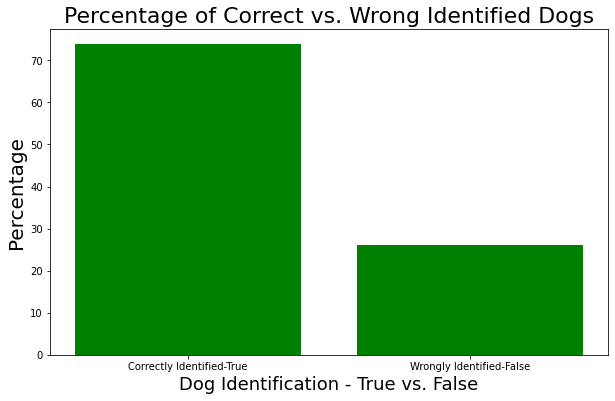

In [212]:
fig = plt.figure(figsize = (10, 6))

plt.bar(dog_identification, p1_values,color='green',width= 0.8)
plt.xlabel('Dog Identification - True vs. False',fontsize=18)
plt.ylabel('Percentage',fontsize=20)
plt.title('Percentage of Correct vs. Wrong Identified Dogs', fontsize=22)
plt.show()

In [206]:
master_dataset['source'].value_counts()

Twitter for iPhone    2034
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

In [210]:
sources = master_dataset['source'].value_counts() / len (master_dataset['source']) * 100
sources

Twitter for iPhone    98.024096
Twitter Web Client     1.445783
TweetDeck              0.530120
Name: source, dtype: float64

- In the merged dataset, it shows Twitter for iPhone as the most source with 98%, accounting for 2034 of the tweet_ids 

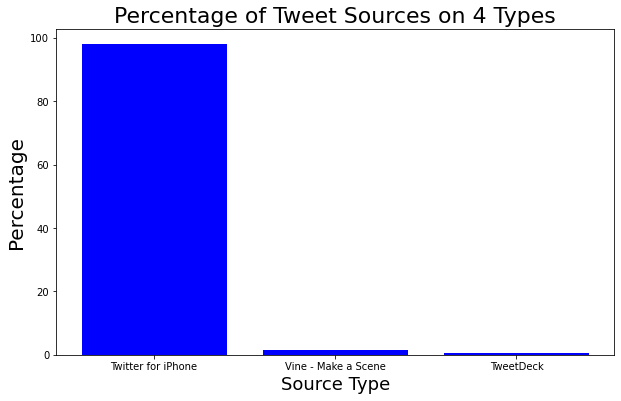

In [209]:
fig = plt.figure(figsize = (10, 6))
source_types = ("Twitter for iPhone", "Vine - Make a Scene", "TweetDeck")

plt.bar(source_types, sources, color='blue',width= 0.8)
plt.xlabel('Source Type',fontsize=18)
plt.ylabel('Percentage',fontsize=20)
plt.title('Percentage of Tweet Sources on 4 Types', fontsize=22)
plt.show()

- From above, it visually seen that most of the tweets are for the source "Twitter for iPhone" with 98%

### References
1. Python Community (2022). [requests 2.28.1](https://pypi.org/project/requests/)